In [133]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.svm import OneClassSVM
from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.datasets import load_digits
from sklearn.datasets import fetch_openml
from sklearn.kernel_approximation import Nystroem

from sklearn_extra.robust import RobustWeightedRegressor
    
pd.set_option('display.max_columns', 300) # Display up to 300 columns from pandas

In [115]:
X, y = fetch_openml(data_id=554, as_frame=True, return_X_y=True)

We select only the numbers $1$ and $0$

In [117]:
X = X.loc[(y == '0') | (y == '1')].values
y = y.loc[(y == '0') | (y == '1')].values

In [118]:
y = (y == '1').astype(int) # replace strings "1" and "0" by int 1 and 0

In [119]:
X.shape

(14780, 784)

In [120]:
np.mean(y) 

0.5329499323410013

In [121]:
size = 28

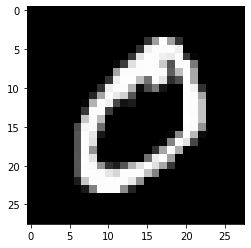

In [157]:
plt.gray() 
plt.imshow(X[0].reshape([size, size])) 
plt.show() 

First, we have to check that our estimator do a good job in classifying this dataset.

In [123]:
from sklearn_extra.robust import RobustWeightedClassifier

In [164]:
clf = Pipeline([ ('scaler', RobustScaler()), 
                ('clf', RobustWeightedClassifier(c=1.35, multi_class='binary'))])
print(np.mean(cross_val_score(clf, X, y, cv=5)))

0.9836265223274696


98.3% is reasonable for a linear classifier. More complicated approaches like CNN could do better but this is not our goal here because it is most likely that a CNN would succeed in rightly classifying the outliers. Let us compute the outlier weights and plot the 500 smaller weights.

In [165]:
scaler = RobustScaler()
X_transformed = scaler.fit_transform(X)
clf = RobustWeightedClassifier(c=1.35, multi_class='binary')
clf.fit(X_transformed,y)

RobustWeightedClassifier(c=1.35, multi_class='binary')

<BarContainer object of 500 artists>

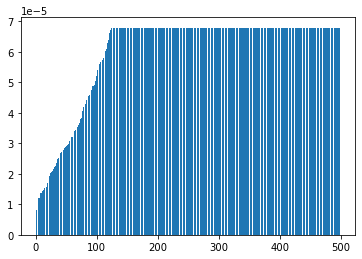

In [166]:
plt.bar(np.arange(len(clf.weights_))[:500], np.sort(clf.weights_)[:500])

Let us look at the outlier images.

In [167]:
outliers = np.argsort(clf.weights_)[:20]

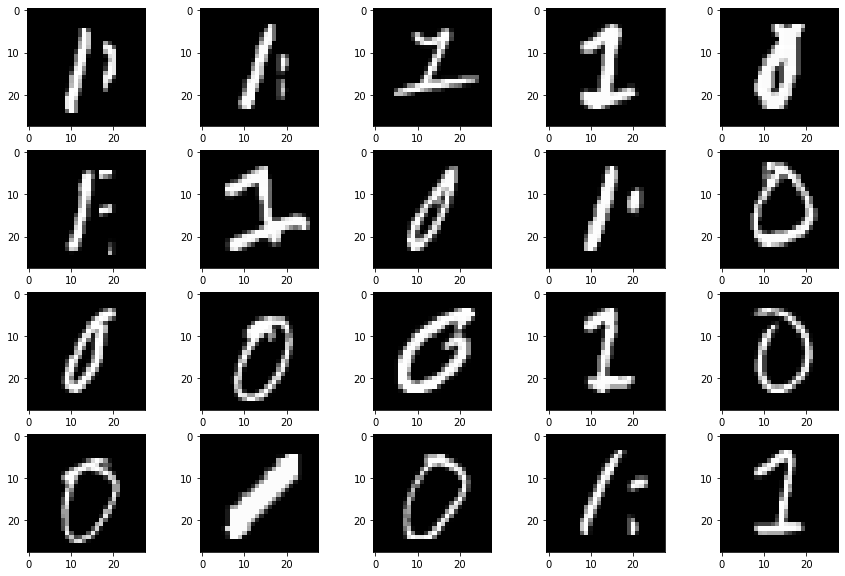

In [168]:
plt.figure(figsize=[15,10])
plt.gray() 
for f in range(20):
    plt.subplot(4,5,f+1)
    plt.imshow(X[outliers[f]].reshape([size, size])) 
plt.show() 

A lot of these pictures seem to be indeed outliers. 

In particular, the outlier "1" are either very thick, or have a bar on the bottom, or have some defect on the right. 